In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_data=pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev_data.head(10))


   VIN (1-10)     County          City State  Postal Code  Model Year    Make  \
0  5YJYGDEE1L       King       Seattle    WA      98122.0        2020   TESLA   
1  7SAYGDEE9P  Snohomish       Bothell    WA      98021.0        2023   TESLA   
2  5YJSA1E4XK       King       Seattle    WA      98109.0        2019   TESLA   
3  5YJSA1E27G       King      Issaquah    WA      98027.0        2016   TESLA   
4  5YJYGDEE5M     Kitsap     Suquamish    WA      98392.0        2021   TESLA   
5  3FA6P0SU8H   Thurston          Yelm    WA      98597.0        2017    FORD   
6  1N4AZ0CP2D     Yakima        Yakima    WA      98903.0        2013  NISSAN   
7  KNAGV4LD9J  Snohomish       Bothell    WA      98012.0        2018     KIA   
8  1N4AZ0CP8F     Kitsap  Port Orchard    WA      98366.0        2015  NISSAN   
9  5UXTA6C03N       King        Auburn    WA      98001.0        2022     BMW   

     Model                   Electric Vehicle Type  \
0  MODEL Y          Battery Electric Vehicle (BEV)   


In [3]:
ev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [5]:
ev_data=ev_data.dropna()


In [6]:
ev_data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

C:\Users\saiki\AppData\Local\Temp\ipykernel_13916\1365183019.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adaptation_by_year.index,y=ev_adaptation_by_year.values,palette='viridis')


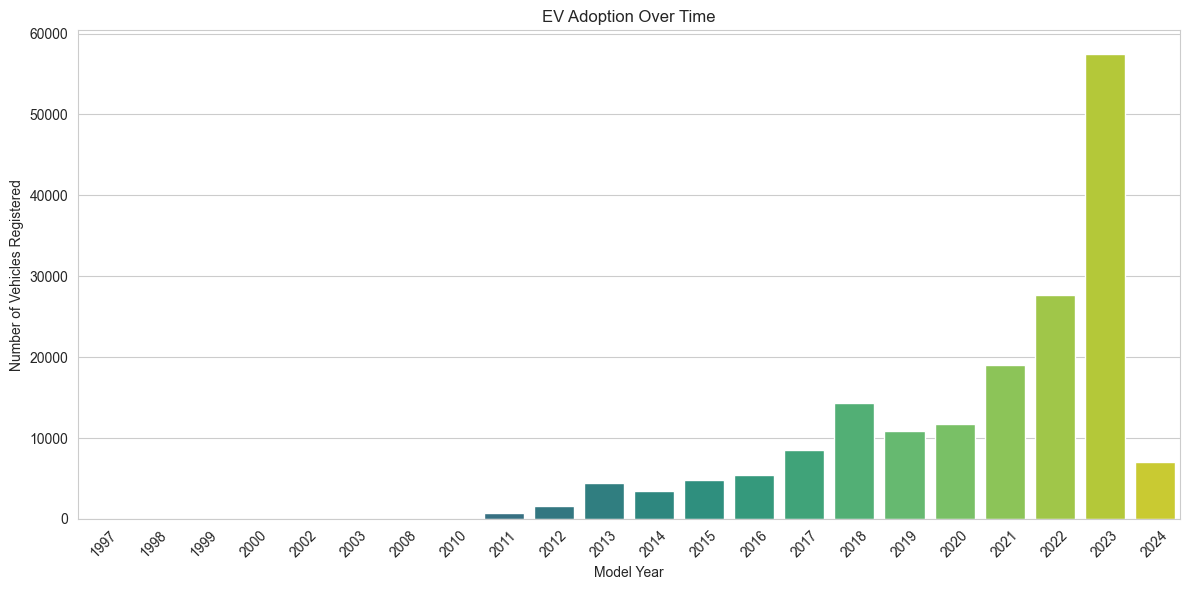

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ev_adaptation_by_year=ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adaptation_by_year.index,y=ev_adaptation_by_year.values,palette='viridis')
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

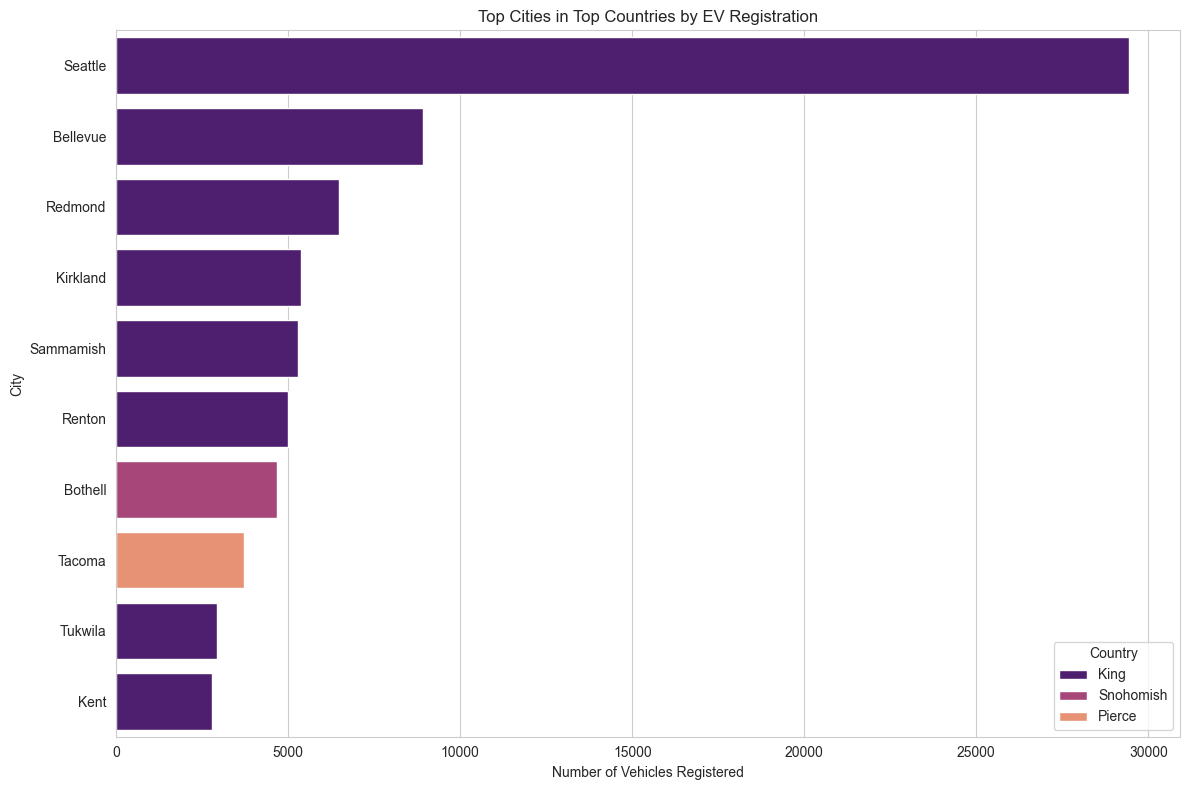

In [12]:
ev_country_distribution=ev_data['County'].value_counts()
top_countries=ev_country_distribution.head(3).index

top_countries_data=ev_data[ev_data['County'].isin(top_countries)]
ev_city_distribution_top_countries=top_countries_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_cities=ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('Top Cities in Top Countries by EV Registration')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

C:\Users\saiki\AppData\Local\Temp\ipykernel_13916\468502002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')


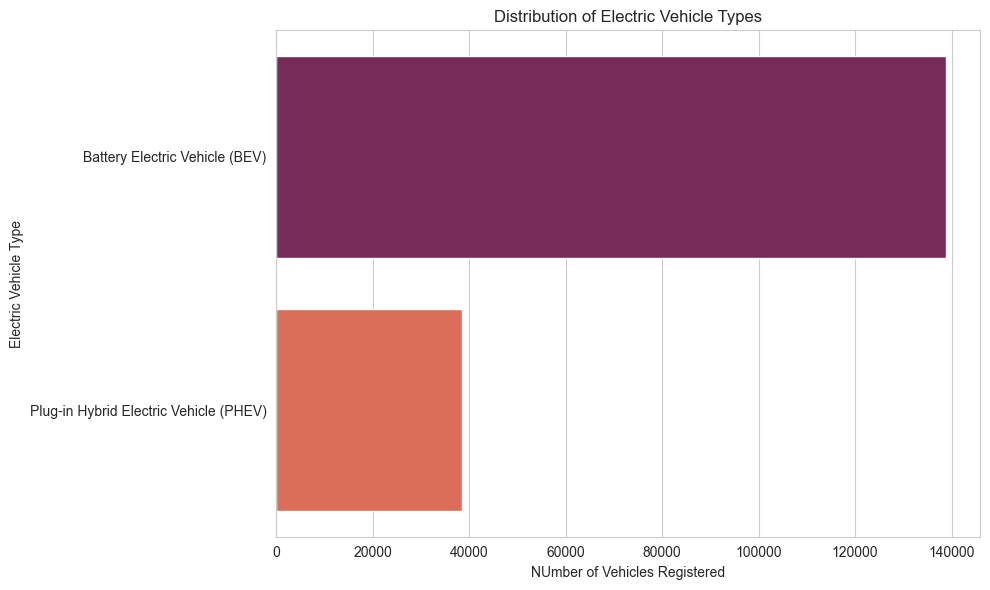

In [13]:
ev_type_distribution=ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('NUmber of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

C:\Users\saiki\AppData\Local\Temp\ipykernel_13916\3479994433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')


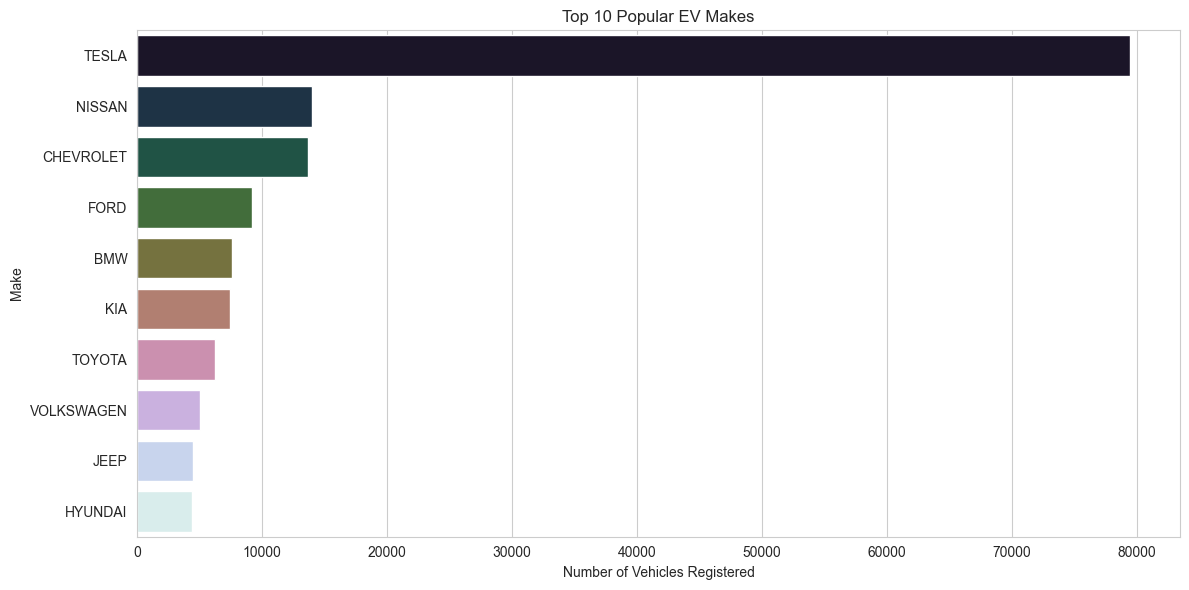

In [14]:
ev_make_distribution=ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

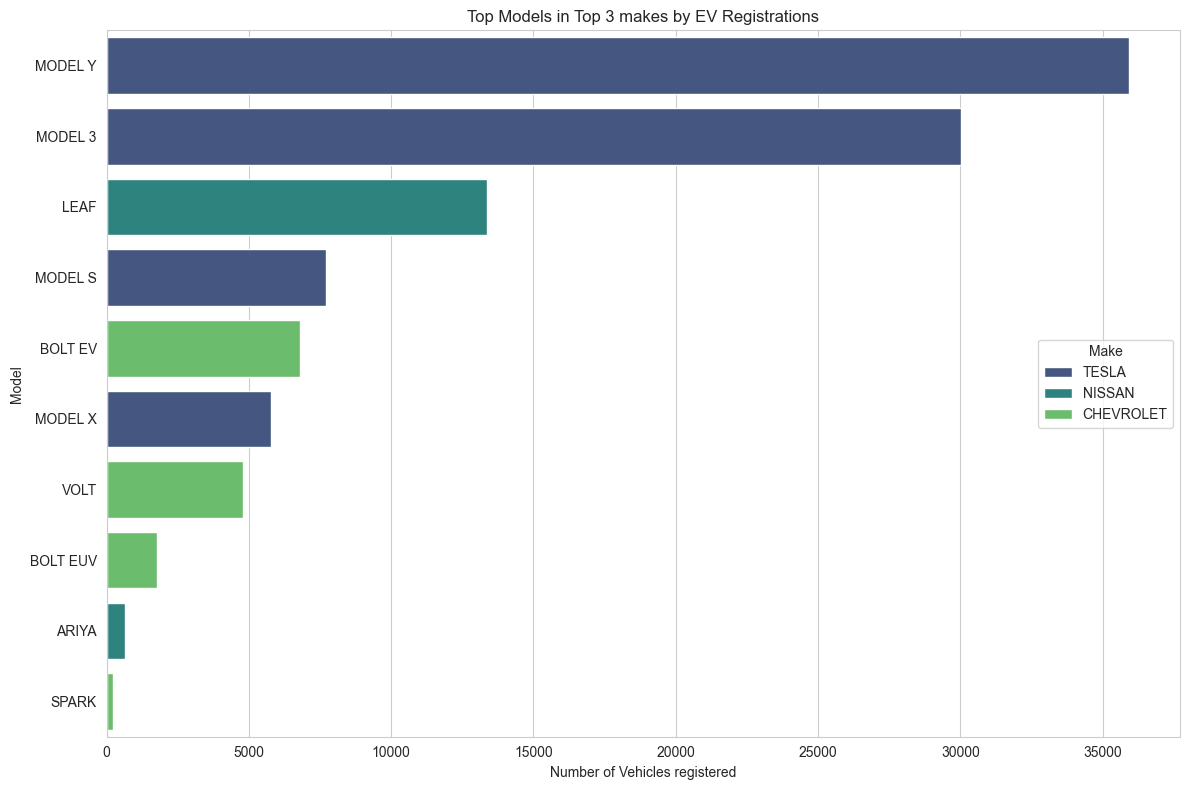

In [15]:
top_3_makes=ev_make_distribution.head(3).index
top_makes_data=ev_data[ev_data['Make'].isin(top_3_makes)]
ev_model_distribution_top_makes=top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
top_models=ev_model_distribution_top_makes.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Number of Vehicles',y='Model',hue='Make',data=top_models,palette='viridis')
plt.title('Top Models in Top 3 makes by EV Registrations')
plt.xlabel('Number of Vehicles registered')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.tight_layout()
plt.show()

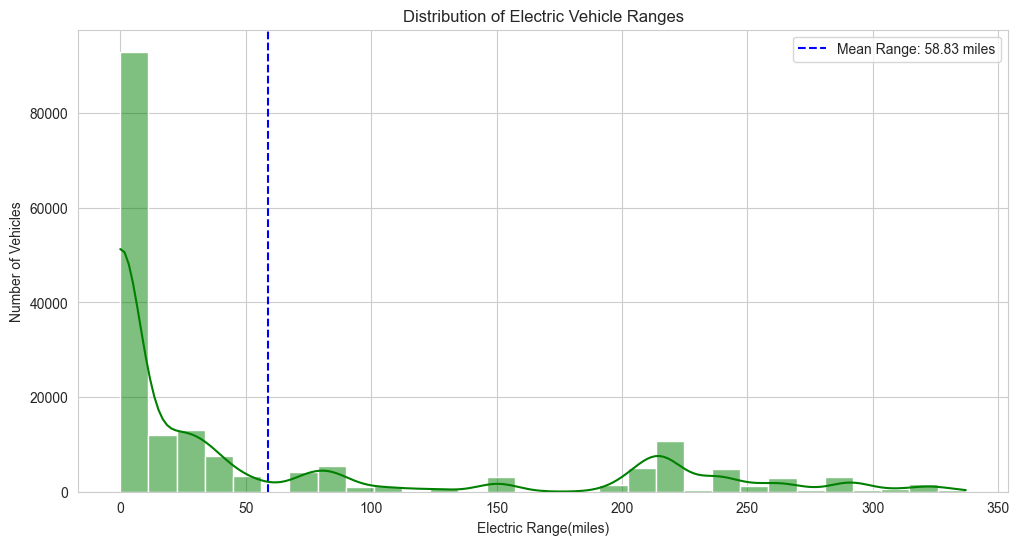

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='green')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range(miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(),color='blue',linestyle='--',label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

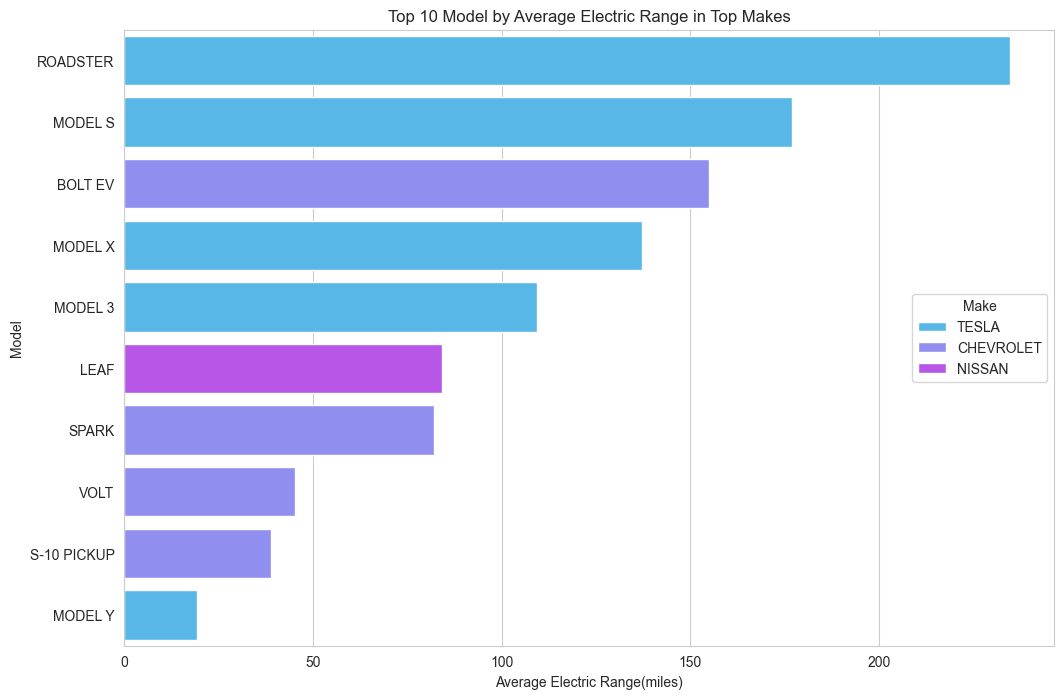

In [17]:
average_range_by_model=top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models=average_range_by_model.head(10)
plt.figure(figsize=(12,8))
barplot=sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette='cool')
plt.title('Top 10 Model by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range(miles)')
plt.ylabel('Model')
plt.legend(title='Make',loc='center right')
plt.show()

In [18]:
ev_registration_counts=ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [19]:
from scipy.optimize import curve_fit
import numpy as np

filtered_years=ev_registration_counts[ev_registration_counts.index<=2023]
def exp_growth(x,a,b):
    return a*np.exp(b*x)
x_data=filtered_years.index - filtered_years.index.min()
y_data=filtered_years.values
params,covariance=curve_fit(exp_growth,x_data,y_data)
forecast_years=np.arange(2024,2034+6)-filtered_years.index.min()
forecasted_values=exp_growth(forecast_years,*params)
forecasted_evs=dict(zip(forecast_years+filtered_years.index.min(),forecasted_values))
print(forecasted_evs)

{np.int64(2024): np.float64(79079.20808938889), np.int64(2025): np.float64(119653.96274428742), np.int64(2026): np.float64(181047.22020265696), np.int64(2027): np.float64(273940.74706208805), np.int64(2028): np.float64(414497.01805382164), np.int64(2029): np.float64(627171.3128407666), np.int64(2030): np.float64(948966.6716959006), np.int64(2031): np.float64(1435872.0265928903), np.int64(2032): np.float64(2172603.673285442), np.int64(2033): np.float64(3287344.9957610364), np.int64(2034): np.float64(4974048.996618504), np.int64(2035): np.float64(7526184.033822056), np.int64(2036): np.float64(11387794.15913792), np.int64(2037): np.float64(17230758.008057714), np.int64(2038): np.float64(26071688.457242187), np.int64(2039): np.float64(39448812.33278453)}


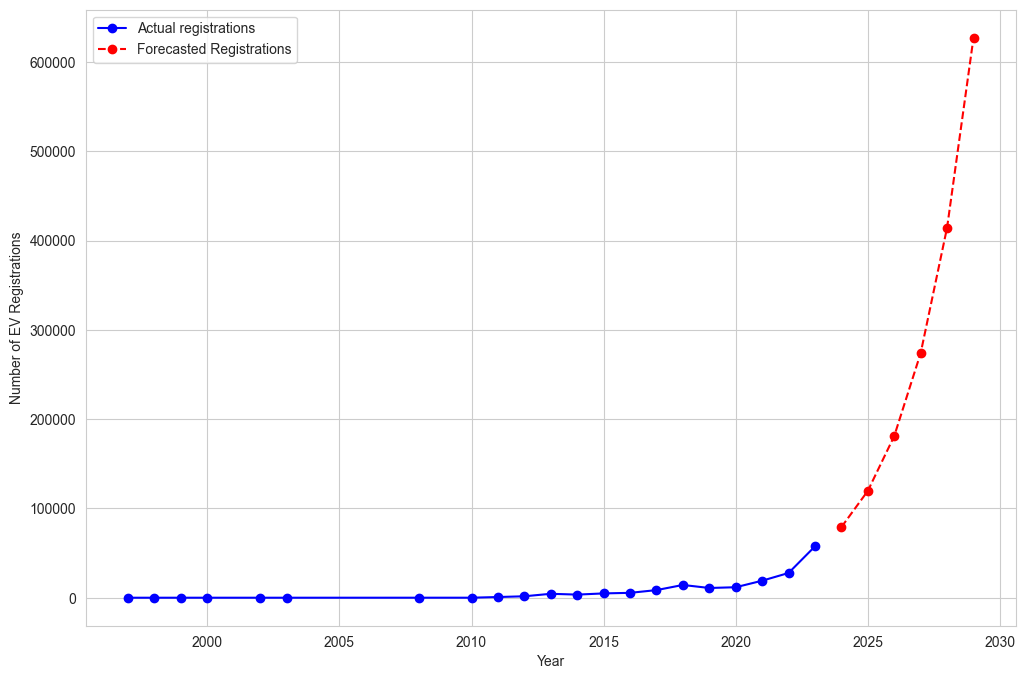

In [20]:
years=np.arange(filtered_years.index.min(),2029+1)
actual_years=filtered_years.index
forecast_years_full=np.arange(2024,2029+1)
actual_values=filtered_years.values
forecasted_values_full=[forecasted_evs[year] for year in forecast_years_full]
plt.figure(figsize=(12,8))
plt.plot(actual_years,actual_values,'bo-',label='Actual registrations')
plt.plot(forecast_years_full,forecasted_values_full,'ro--',label='Forecasted Registrations')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.show()